In [1]:
#1. Importing Libraries
import pandas as pd 
import numpy as np

In [2]:
df= pd.read_csv('Cars_4vars.csv')
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
df.columns # to display column names 

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [5]:
df.corr() # Correlation Matrix

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


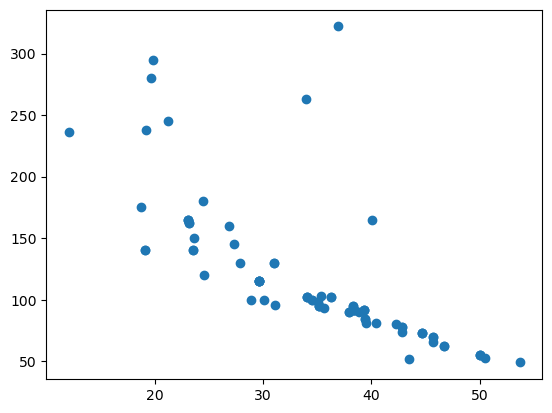

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x=df['MPG'],y=df['HP'])
plt.show()

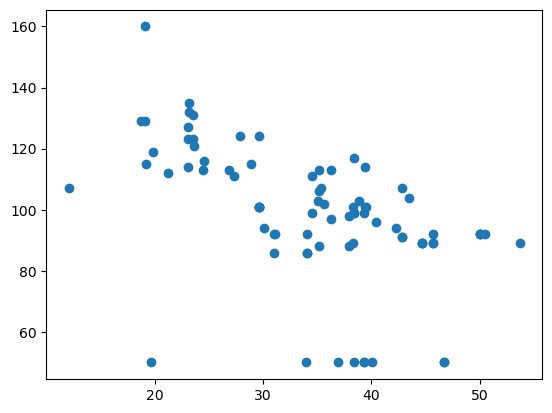

In [7]:
plt.scatter(x=df['MPG'],y=df['VOL'])
plt.show()

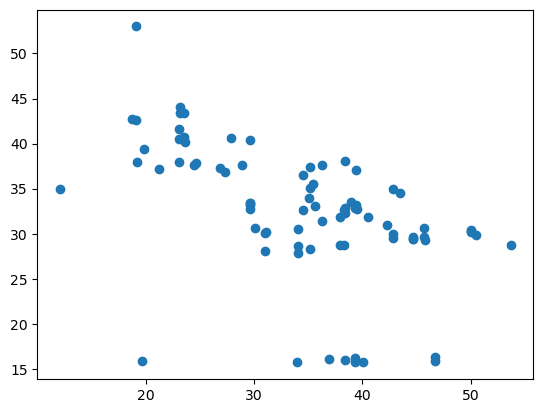

In [8]:
plt.scatter(x=df['MPG'],y=df['WT'])
plt.show()

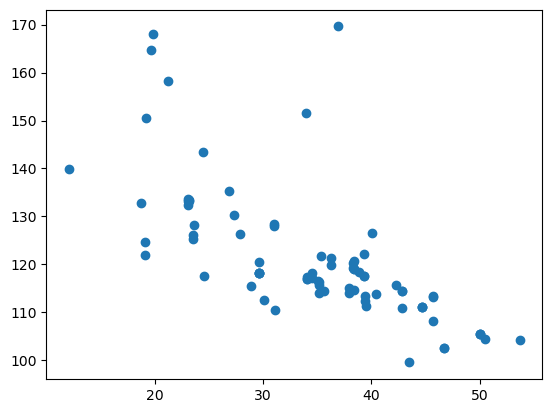

In [9]:
plt.scatter(x=df['MPG'],y=df['SP'])
plt.show()

MPG VS HP


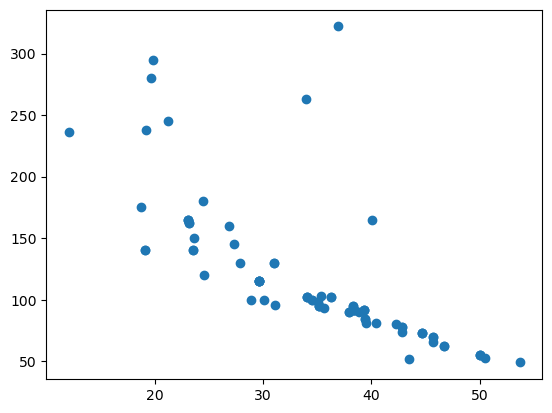

___________________________________________________________________________
MPG VS VOL


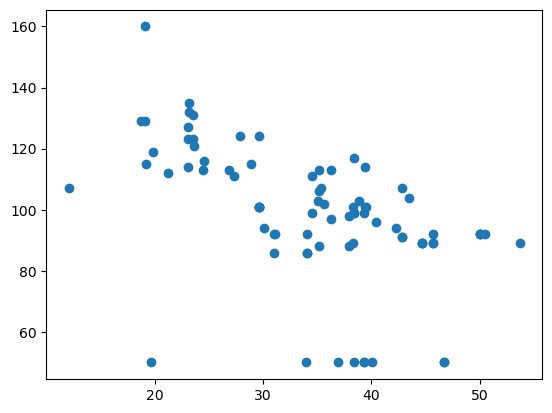

___________________________________________________________________________
MPG VS SP


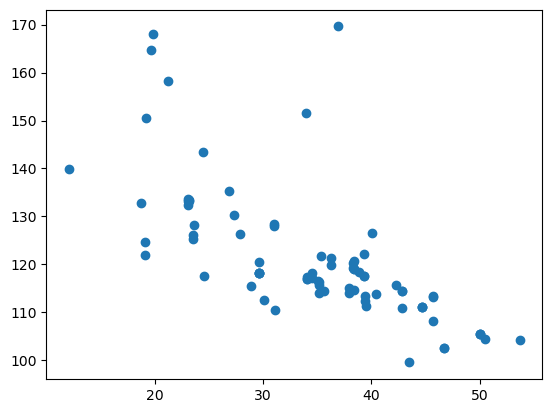

___________________________________________________________________________
MPG VS WT


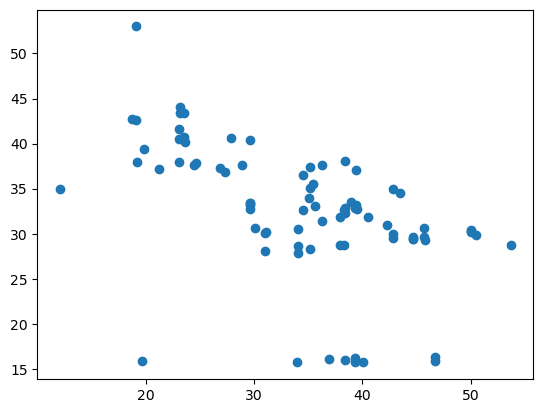

___________________________________________________________________________


In [10]:
a=df.columns
Columns = a.drop('MPG')
for col_name in Columns:
    print("MPG VS",col_name)
    plt.scatter(x=df['MPG'],y=df[col_name])
    plt.show()
    print ('_'*75)

In [11]:
# Model 1: with HP
Y = df["MPG"]
X = df[["HP"]]

# Model Building
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model Fit
model.fit(X, Y)

# Model Prediction
df["Y_pred"] = model.predict(X)

# Metrics RMSE, R2_Score
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
rmse1 = root_mean_squared_error(Y, df["Y_pred"])
r21 = r2_score(Y, df["Y_pred"])

print("RMSE:", np.round(rmse1, 2))
print("R2 Score =",r21)

RMSE: 6.25
R2 Score = 0.5256806086282022


In [12]:
# Model 2: with HP and SP 
Y = df["MPG"]
X = df[["HP","SP"]]

# Model Building
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model Fit
model.fit(X, Y)

# Model Prediction
df["Y_pred"] = model.predict(X)

# Metrics RMSE, R2_Score
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
rmse2 = root_mean_squared_error(Y, df["Y_pred"])
r22 = r2_score(Y, df["Y_pred"])

print("RMSE:", np.round(rmse2, 2))
print("R2 Score =",r22)

RMSE: 6.2
R2 Score = 0.532639171285165


In [13]:
# Model 3: with HP, SP and VOL
Y = df["MPG"]
X = df[["HP","SP","VOL"]]

# Model Building
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model Fit
model.fit(X, Y)

# Model Prediction
df["Y_pred"] = model.predict(X)

# Metrics RMSE, R2_Score
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
rmse3 = root_mean_squared_error(Y, df["Y_pred"])
r23 = r2_score(Y, df["Y_pred"])

print("RMSE:", np.round(rmse3, 2))
print("R2 Score =",r23)

RMSE: 4.35
R2 Score = 0.770368341321302


In [14]:
# Model 4: with HP, SP, VOl and WT
Y = df["MPG"]
X = df[["HP","SP","VOL","WT"]]

# Model Building
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model Fit
model.fit(X, Y)

# Model Prediction
df["Y_pred"] = model.predict(X)

# Metrics RMSE, R2_Score
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
rmse4 = root_mean_squared_error(Y, df["Y_pred"])
r24 = r2_score(Y, df["Y_pred"])

print("RMSE:", np.round(rmse4, 2))
print("R2 Score =",r24)

RMSE: 4.35
R2 Score = 0.7705372737359844


In [15]:
metrics_summary = {
    'Model1': [np.round(rmse1, 2), r21],
    'Model2': [np.round(rmse2, 2), r22],
    'Model3': [np.round(rmse3, 2), r23],
    'Moddel4': [np.round(rmse4, 2), r24],
}
metrics_df = pd.DataFrame.from_dict(metrics_summary,columns = ['RMSE', 'R2'], orient='index')
display(metrics_df)

,RMSE,R2
Model1,6.25,0.525681
Model2,6.20,0.532639
Model3,4.35,0.770368
Moddel4,4.35,0.770537


In [16]:
metrics_df['RMSE'].idxmin() # to identify minimum RMSE in models

'Model3'

In [17]:
metrics_df.loc['Model3'] # to access the data of perticular Model (to access perticular row) 

RMSE    4.350000
R2      0.770368
Name: Model3, dtype: float64

In [18]:
metrics_df['Best_Model']= {}
metrics_df.loc[metrics_df['RMSE'] == metrics_df['RMSE'].min(), 'Best_Model'] = 'Lowest RMSE'
metrics_df

,RMSE,R2,Best_Model
Model1,6.25,0.525681,NaN
Model2,6.20,0.532639,NaN
Model3,4.35,0.770368,Lowest RMSE
Moddel4,4.35,0.770537,Lowest RMSE


In [19]:
from statsmodels.formula.api import ols
model = ols("MPG~ HP", data= df).fit()

r2 = model.rsquared
print ("R squared: ",r2)

model.resid

R squared:  0.5256806086282022


0     11.341603
1      8.349848
2      8.349848
3      5.771583
4      8.608837
        ...    
76    26.187323
77    -1.252144
78    16.447991
79     5.991192
80    -8.580610
Length: 81, dtype: float64

In [20]:
from statsmodels.formula.api import ols
model = ols("MPG~ HP + SP ", data= df).fit()

r2 = model.rsquared
print ("R squared: ",r2)

model.resid

R squared:  0.5326391712851649


0     11.530370
1      8.579974
2      8.579974
3      4.967908
4      8.961042
        ...    
76    26.518103
77    -1.226341
78    17.661362
79     5.169511
80    -6.131073
Length: 81, dtype: float64

In [21]:
from statsmodels.formula.api import ols
model = ols("MPG~ HP + SP + VOL", data= df).fit()

r2 = model.rsquared
print ("R squared: ",r2)

model.resid

R squared:  0.770368341321302


0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

In [26]:
from statsmodels.formula.api import ols
model = ols("MPG~ HP + SP + VOL + WT", data= df).fit()

r2 = model.rsquared
print ("R squared: ",r2)

model.resid

R squared:  0.7705372737359844


0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Length: 81, dtype: float64

In [29]:
model.resid.sum()

5.334399588718952e-12

In [23]:
#4. Split into x and   (Another Method) 
X=df.copy()
X=X.drop(["MPG"],axis=1)
x=X
y=df[["MPG"]]

#5. Model Building
from sklearn.linear_model import LinearRegression
model = LinearRegression ()

#6. Model fitting
model.fit(x,y)
print( "Slope =",model.coef_ ,"and intercept =" ,model.coef_)
# Model Prediction
df["Y_pred"] = model.predict(X)

# Metrics RMSE, R2_Score
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
rmse = root_mean_squared_error(Y, df["Y_pred"])
r2 = r2_score(Y, df["Y_pred"])

print("RMSE:", np.round(rmse, 2))
print("R2 Score =",r2)

Slope = [[-0.1395566  -0.22827718  0.26874683  0.27210741  0.32070642]] and intercept = [[-0.1395566  -0.22827718  0.26874683  0.27210741  0.32070642]]
RMSE: 4.35
R2 Score = 0.7705372737359844


In [40]:
# 3 important models

# 1. Full Model building
print("FULL MODEL with HP + SP + VOL + WT")
from statsmodels.formula.api import ols
model = ols("MPG ~ HP + SP + VOL + WT",data = df).fit()
r2 = model.rsquared
print("R squared: ",r2)
rmse =np.sqrt(np.mean(model.resid**2))
print("RMSE: ",rmse)

# 2. With Multicollinearity
print()
print("MULTICOLLINEARITY MODEL with HP + SP")
from statsmodels.formula.api import ols
model = ols("MPG ~ HP + SP",data = df).fit()
r2 = model.rsquared
print("R squared: ",r2)
rmse =np.sqrt(np.mean(model.resid**2))
print("RMSE: ",rmse)

# 3. Best Fit Model
print()
print("BEST FIT MODEL with HP + VOL")
from statsmodels.formula.api import ols
model = ols("MPG ~ HP + VOL",data = df).fit()
r2 = model.rsquared
print("R squared: ",r2)
rmse =np.sqrt(np.mean(model.resid**2))
print("RMSE: ",rmse)

FULL MODEL with HP + SP + VOL + WT
R squared:  0.7705372737359844
RMSE:  4.347084212704315

MULTICOLLINEARITY MODEL with HP + SP
R squared:  0.5326391712851649
RMSE:  6.203947782760671

BEST FIT MODEL with HP + VOL
R squared:  0.7506606277376423
RMSE:  4.5314522690953964


In [38]:
from statsmodels.formula.api import ols
model = ols("MPG ~ HP + SP",data = df).fit()
r2 = model.rsquared
print("R squared: ",r2)

print(model.summary())

R squared:  0.5326391712851649
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     44.45
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           1.31e-13
Time:                        15:11:47   Log-Likelihood:                -262.77
No. Observations:                  81   AIC:                             531.5
Df Residuals:                      78   BIC:                             538.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0209

**Interpreting VIF scores :**
While a common rule of thumb suggests that a VIF greater than 10 indicates serious multicollinearity, other thresholds are also used. Interpretations may vary depending on the field of study and the model's purpose. 
- VIF < 5: Moderate correlation, generally acceptable.
- VIF > 5: High correlation, cause for concern.
- VIF > 10: Severe multicollinearity, requires correction. 

In [36]:
model = ols("HP ~ SP",data = df).fit()
r2 = model.rsquared
print("R squared: ",r2)

VIF= 1 / (1-r2)
print(" VIF :", VIF)

R squared:  0.9483800677016775
 VIF : 19.372361711379014


In [39]:
from statsmodels.formula.api import ols
model = ols("MPG ~ HP + SP",data = df).fit()
r2 = model.rsquared
print("R squared: ",r2)

model = ols("HP ~ VOL",data = df).fit()
r2 = model.rsquared
print("R squared: ",r2)

VIF= 1 / (1-r2)
print(" VIF :", VIF)

R squared:  0.5326391712851649
R squared:  0.005999970050444947
 VIF : 1.0060361869916135
